In [35]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image
import pandas as pd

In [ ]:
dataset= r'TrainTest_3.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [37]:
# 获取空值的位置信息并打印
for i in range(len(data)):
    for j in range(len(data.columns)):
        if pd.isna(data.iloc[i, j]) or (pd.notna(data.iloc[i, j]) and str(data.iloc[i, j]).strip() == ''):
            print('第{}行、第{}列存在空值'.format(i+1, j+1))

第1行、第73列存在空值
第2行、第73列存在空值
第3行、第73列存在空值
第4行、第73列存在空值
第5行、第73列存在空值
第6行、第73列存在空值
第7行、第73列存在空值
第8行、第73列存在空值
第9行、第73列存在空值
第10行、第73列存在空值
第11行、第73列存在空值
第12行、第73列存在空值
第13行、第73列存在空值
第14行、第73列存在空值
第15行、第73列存在空值
第16行、第73列存在空值
第17行、第73列存在空值
第18行、第73列存在空值
第19行、第73列存在空值
第20行、第73列存在空值
第21行、第73列存在空值
第22行、第73列存在空值
第23行、第73列存在空值
第24行、第73列存在空值
第25行、第73列存在空值
第26行、第73列存在空值
第27行、第73列存在空值
第28行、第73列存在空值
第29行、第73列存在空值
第30行、第73列存在空值
第31行、第73列存在空值
第32行、第73列存在空值
第33行、第73列存在空值
第34行、第73列存在空值
第35行、第73列存在空值
第36行、第73列存在空值
第37行、第73列存在空值
第38行、第73列存在空值
第39行、第73列存在空值
第40行、第73列存在空值
第41行、第73列存在空值
第42行、第73列存在空值
第43行、第73列存在空值
第44行、第73列存在空值
第45行、第73列存在空值
第46行、第73列存在空值
第47行、第73列存在空值
第48行、第73列存在空值
第49行、第73列存在空值
第50行、第73列存在空值
第51行、第73列存在空值
第52行、第73列存在空值
第53行、第73列存在空值
第54行、第73列存在空值
第55行、第73列存在空值
第56行、第73列存在空值
第57行、第73列存在空值
第58行、第73列存在空值
第59行、第73列存在空值
第60行、第73列存在空值
第61行、第73列存在空值
第62行、第73列存在空值
第63行、第73列存在空值
第64行、第73列存在空值
第65行、第73列存在空值
第66行、第73列存在空值
第67行、第73列存在空值
第68行、第73列存在空值
第69行、第73列存在空值
第70行、第73列存在空值
第71行、第73列存在空值
第72行、第73列存在空值
第

In [38]:
dataset= r'TrainTest_3.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_Data=data.iloc[:,:]
global corMat
corMat = pd.DataFrame(all_Data.corr())  #corr 求相关系数矩阵
corMat.to_csv('./outputs_Elemental+OneHot/heatmap-before.csv')
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plt.savefig('./outputs_Elemental+OneHot/heatmap-before.png', dpi=300, bbox_inches = 'tight')
plt.close()

In [40]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 20
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("Whether features are selected：\n", rfe.support_)                                          # ndarray
print("Feature size:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("Final features (s_rfe):", r.Features.values)                                        # ndarray
print("target:", target)
print("data after rfe feature selection (data_rfe):", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

Whether features are selected：
 [False False False False False False False  True False False False False
 False False False  True False False False False False False False False
 False False  True False False False False  True False False False False
 False False False  True False False False False False False False  True
 False False False False False False False  True False False False False
 False False False  True False  True False False False False False  True
  True  True  True  True False  True  True  True False False False False
 False False False False False False  True  True False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False 

In [41]:
data_rfe

,Ion NumberofProtons,Ion NumberofNeutrons,B Specific Heat,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion AtomicMass,A2 Melting Point,Ion Melting Point,...,MagpieData mean MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mean MeltingT,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData mean GSvolume_pa,MagpieData mean GSbandgap,MagpieData mean SpaceGroupNumber,Adsorption energy(ev)
0,3,4,0.320,3.582,0.5340,2.10,5.3917,6.941,453.85,453.85,...,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857,-7.004905
1,30,35,0.320,0.388,7.1300,1.50,9.3942,65.380,453.85,692.88,...,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857,0.395232
2,19,20,0.320,0.757,0.8620,2.80,4.3407,39.098,453.85,336.50,...,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857,-6.580689
3,11,12,0.320,1.228,0.9710,2.20,5.1391,22.990,453.85,371.15,...,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857,-5.557395
4,13,14,0.320,0.897,2.7000,1.80,5.9858,26.982,453.85,933.40,...,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,11,12,0.228,1.228,0.9710,2.20,5.1391,22.990,312.79,371.15,...,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857,-1.934356
636,13,14,0.228,0.897,2.7000,1.80,5.9858,26.982,312.79,933.40,...,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857,-0.151069
637,20,20,0.228,0.647,1.5400,2.20,6.1132,40.078,312.79,1112.15,...,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857,-4.757395
638,12,12,0.228,1.023,1.7400,1.70,7.6462,24.305,312.79,923.15,...,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857,-0.462000


In [42]:
s_rfe

,Ion NumberofProtons,Ion NumberofNeutrons,B Specific Heat,Ion Specific Heat,Ion Density,Ion AtomicRadius,Ion Firstlonization,Ion AtomicMass,A2 Melting Point,Ion Melting Point,MagpieData mean Number,MagpieData mean MendeleevNumber,MagpieData mean AtomicWeight,MagpieData mean MeltingT,MagpieData mean Row,MagpieData mean CovalentRadius,MagpieData mean Electronegativity,MagpieData mean GSvolume_pa,MagpieData mean GSbandgap,MagpieData mean SpaceGroupNumber
0,3,4,0.320,3.582,0.5340,2.10,5.3917,6.941,453.85,453.85,10.571429,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857
1,30,35,0.320,0.388,7.1300,1.50,9.3942,65.380,453.85,692.88,10.571429,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857
2,19,20,0.320,0.757,0.8620,2.80,4.3407,39.098,453.85,336.50,10.571429,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857
3,11,12,0.320,1.228,0.9710,2.20,5.1391,22.990,453.85,371.15,10.571429,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857
4,13,14,0.320,0.897,2.7000,1.80,5.9858,26.982,453.85,933.40,10.571429,64.714286,23.216516,333.254286,2.285714,86.285714,2.841429,13.574524,1.180429,106.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,11,12,0.228,1.228,0.9710,2.20,5.1391,22.990,312.79,371.15,37.714286,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857
636,13,14,0.228,0.897,2.7000,1.80,5.9858,26.982,312.79,933.40,37.714286,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857
637,20,20,0.228,0.647,1.5400,2.20,6.1132,40.078,312.79,1112.15,37.714286,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857
638,12,12,0.228,1.023,1.7400,1.70,7.6462,24.305,312.79,923.15,37.714286,66.857143,87.765791,320.985714,4.428571,151.571429,2.177143,49.965000,1.015714,122.142857


In [43]:
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [44]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [45]:
feature_names = list(data_rfe.columns[:-1])

In [46]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=20, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.67          4.78947        9          1.85757              N/A     26.87s
   1     8.50          3.09161       19          1.88947              N/A     28.32s
   2     8.96          3.00059       14          1.80662              N/A     28.08s
   3     9.11          3.00052       30          1.51956              N/A     26.00s
   4    12.13          2.86504       22          1.43148              N/A     25.05s
   5    13.37          2.47061       25          1.40885              N/A     27.15s
   6    16.74          2.41988       29          1.29441              N/A     23.48s
   7    24.68          2.72676       29          1.29441              N/A     22.77s
   8    27.08           2.6602       30          1.29277              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [47]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.0153940666619745


In [48]:
print(X_test.shape[1])

20


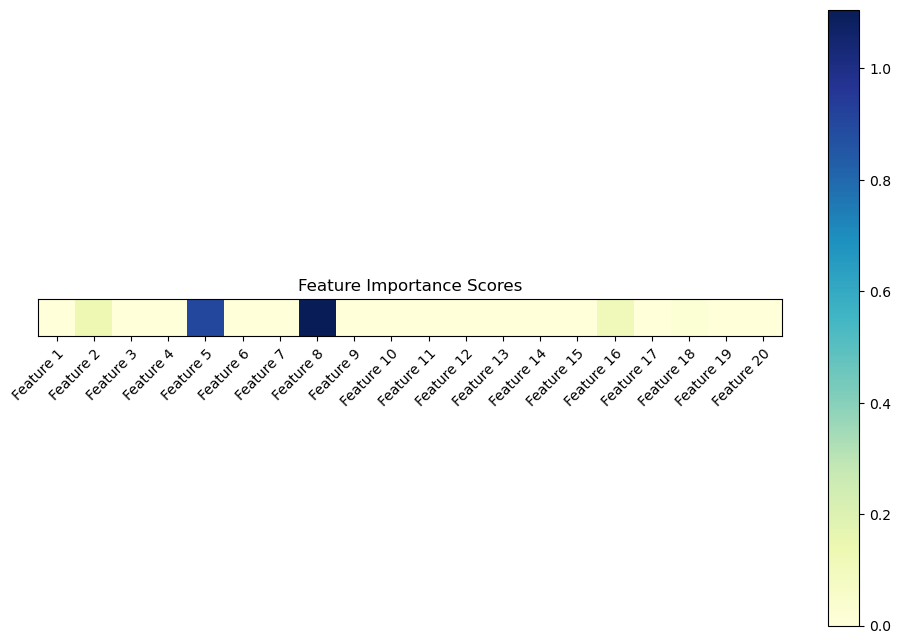

In [49]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.show()
# 这个代码会创建一个热力图，显示特征重要性分数。
# x轴显示特征编号，每个单元格的颜色表示该特征的重要性分数，颜色越亮，意味着该特征对该模型越重要。

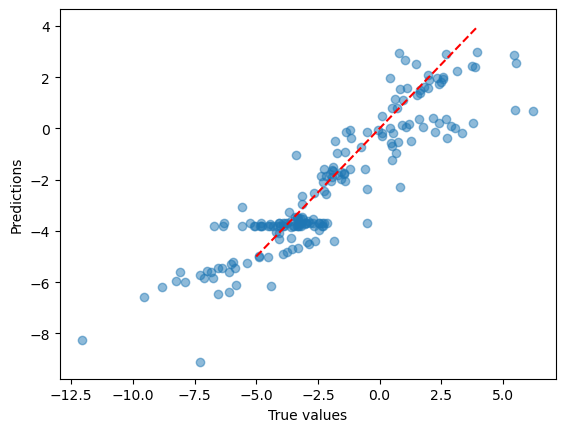

In [50]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

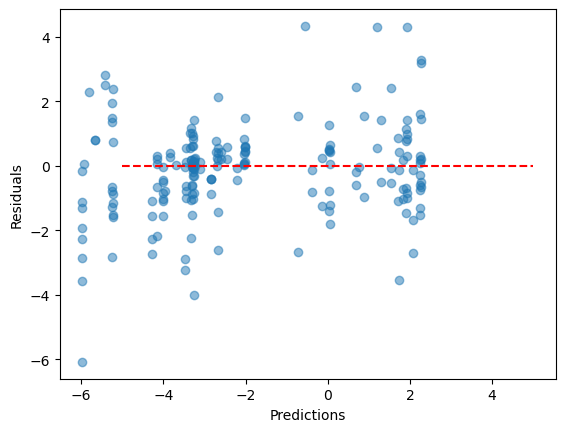

In [25]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。